# Final Project 3

# A. Perkenalan

**Team :**\
    **1. Cindo Fara Aqsyada Agatha (PYTN-KS009-013)**\
    **2. Nurianti Ahmad (PYTN-KS009-021)**

# Projects Overview

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.

# Attribute Information : 
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for use

# Objective 
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan



# B. Import Library


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, normalize,RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# D. Data Loading 
Pada Tahap Data Loading, hal yang dilakukan adalah :
- Mengimpor dataset
- Menampilkan tabel dataset (teratas dan terbawah)
- Melihat jumlah baris dan kolom
- Melihat informasi tiap variabel

In [27]:
# Mengimpor dataset
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [29]:
df.shape

(8950, 18)

Terdapat 8950 baris dan 18 kolom

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# D. Data Cleaning
Pada tahap data cleaning, hal yang dilakukan adalah :
- Mengecek missing value
- Cek duplikasi data

In [32]:
# Describe the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean BALANCE is $1,564

BALANCE_FREQUENCY is frequently updated on average ~0.9

PURCHASES average is $1,000

ONEOFF_PURCHASES average is ~$600

Average PURCHASES_FREQUENCY is around 0.5

Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY

Average CREDIT_LIMIT is ~$4,500

Average PRC_FULL_PAYMENT is 15%

Average TENURE is 11.5 years

In [33]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m' 

# Check the missing data
print(df.isnull().sum())
print(clr.S+'----------------------------------------\n Percentage of missing data: \n'+clr.E)
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


In [34]:
print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum())
# print(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull())

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64


In [35]:
print(df['CUST_ID'].count())

8950


Dilanjutkan dengan mengisi missing elements dengan nilai rata-rata dari setiap variabel

<!-- dilanjutkan dengan mengisi missing elements dengan nilai rata2 dari setiap variabel -->

In [36]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
# Chek duplicated entries in the data
df2 = df.copy()
print(clr.S+'Duplicated in this dataset:'+clr.E, df.duplicated().sum())

Duplicated in this dataset: 0


tidak terdapat duplikasi data

# menghilangkan kolom Customer ID
Hal ini dilakukan karena kolom customer id tidak dibutuhkan dalam clustering

In [38]:
# Drop Customer ID column 'CUST_ID'
df2.drop('CUST_ID', axis = 1, inplace = True)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [39]:
# Get the column names
df2.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# E. Exploratory data

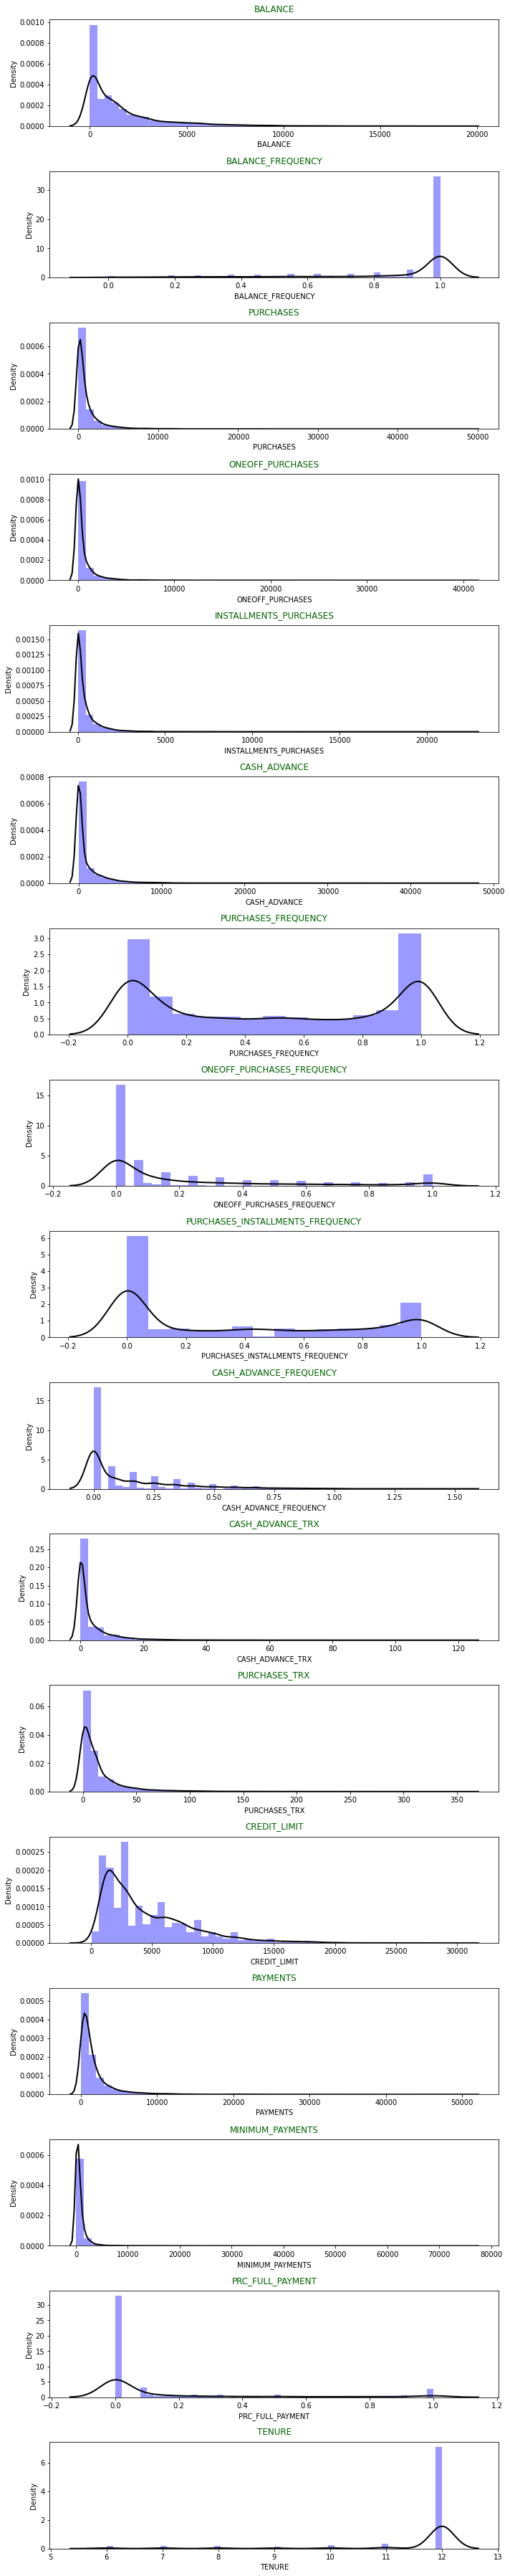

In [40]:
# Plot the distribution
plt.figure(figsize = (10,50))
for i in range(len(df2.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df2[df2.columns[i]], 
                 kde_kws={'color':'black', 'lw':2, 'label':'KDE'}, hist_kws={'color':'blue'})                 
    plt.title(df2.columns[i], color= 'darkgreen', y=1.03)
plt.tight_layout()

dari data terlihat jelas bahwa kebanyakan kolom itu memiliki banyak outlier, dibuktikan dari beberapa grafik nya yang skew negatif dan positif dan tidak terdistribusi di tengah(normal distribution), maka dalam kasus ini saya akan melakukan normalisasi data menggunakan robust scaler disebabkan robust scaler akan melakukan normalisasi data dengan memperhitungkan nilai outliernya.

# F. Pre-processing data
- darisini kita akan melakukan elbow method untuk sekedar menjadikan acuan rekomendasi untuk menentukan jumlah cluster, dan bukan menjadikan elbow ini sebagai acuan inti sebagai penentuan clusternya, sebab kembali pada algoritma ini bahwa clustering merupakan metode exploratif bukan metode inferensia(predictif).

In [41]:
# Scale the data first
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df2)
df_scaled.shape

(8950, 17)

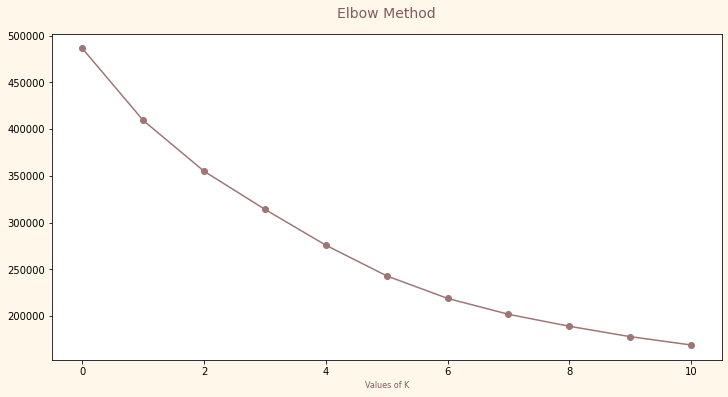

In [42]:
scores_1 = []
range_values = range(1,12)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (12,6), facecolor = '#FFF8EA') 
plt.plot(scores_1, 'bx-', marker = 'o', color = '#9E7676')
plt.xlabel('Values of K', fontsize = 8, color='#815B5B')
plt.title('Elbow Method', fontsize = 14, color='#815B5B', y=1.03);

Kita dapat mengamati bahwa, klaster ke-4 tampaknya membentuk siku-siku dari kurva. Namun, nilai-nilai tersebut tidak berkurang secara linear hingga klaster ke-8. Mari kita pilih jumlah cluster menjadi 7 atau 8, namun balik lagi bahwa elbow method ini tidak bisa menjadi acuan utama yang menjadikan cluster itu harus di cluster 7 atau 8, namun sekedar rekomendasi awal saja, perlu analisis lanjutan untuk menentukan cluster tersebut secara optimal.

# H. Pelatihan Model

## K-Means


In [43]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(7, 17)

In [56]:
labels[0:11]

array([0, 5, 0, 1, 0, 0, 6, 0, 0, 1, 0])

In [58]:
kmeans.cluster_centers_[0:6]

array([[ 2.92996419e-01, -2.26784721e-01,  2.02688843e-01,
         4.87847330e-01,  3.62343696e-01,  4.82145002e-01,
        -5.20319324e-02,  2.99675191e-01,  2.17904367e-01,
         5.39525413e-01,  5.46521036e-01,  2.11847694e-01,
         1.20729661e-01,  1.10196885e-01,  5.02413622e-01,
         2.31310889e-01, -4.08171521e-01],
       [-3.72143791e-01, -5.68639250e+00, -4.54952639e-02,
         2.57955833e-01,  7.94007771e-02,  3.86689125e-01,
        -2.71827105e-01, -4.27701679e-02,  4.55807256e-02,
         2.33871700e-01,  2.68579686e-01, -1.58495045e-01,
         1.18946506e-01,  1.31795194e-01, -6.57546395e-02,
         7.32936271e-01, -7.62180017e-01],
       [ 1.75117575e+00, -1.02272727e-01,  7.03218237e-01,
         2.43234818e-01,  1.80657034e+00,  1.14334070e+00,
        -2.37013096e-02, -9.24413095e-02,  3.63996690e-01,
         5.22321710e-01,  9.01785714e-01,  7.56696429e-01,
         3.03024781e-01,  7.00995291e-01,  3.25861696e+01,
         1.04166354e-02, -8.9

In [44]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df2.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.292996,-0.226785,0.202689,0.487847,0.362344,0.482145,-0.052032,0.299675,0.217904,0.539525,0.546521,0.211848,0.120730,0.110197,0.502414,0.231311,-0.408172
1,-0.372144,-5.686393,-0.045495,0.257956,0.079401,0.386689,-0.271827,-0.042770,0.045581,0.233872,0.268580,-0.158495,0.118947,0.131795,-0.065755,0.732936,-0.762180
2,1.751176,-0.102273,0.703218,0.243235,1.806570,1.143341,-0.023701,-0.092441,0.363997,0.522322,0.901786,0.756696,0.303025,0.700995,32.586170,0.010417,-0.089286
3,-0.390657,-1.246321,0.752370,0.800367,1.232627,0.045658,0.359560,0.604211,0.611022,0.050420,0.045808,0.721262,0.338040,0.320081,-0.225002,5.465052,-0.585998
4,2.455144,-0.412810,26.186841,39.522445,11.622427,0.910565,0.480909,2.532830,0.705050,0.187500,0.465909,7.443182,2.629870,17.972329,4.526802,3.665121,-0.090909
5,1.915716,-0.347067,0.130921,0.457891,0.235031,4.606365,-0.240520,0.192849,0.044838,2.229460,3.898990,0.077967,0.920687,2.036152,1.988157,0.307988,-0.655556
6,1.082686,-0.136858,4.919815,6.328490,3.943065,0.555140,0.518675,2.076400,0.772465,0.339350,0.470614,4.104276,1.072467,2.879903,1.379672,1.561151,-0.078947


In [45]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Fit the KMeans model
y_kmeans = kmeans.fit_predict(df_scaled)
# Calculate Silhoutte Score
score = silhouette_score(df_scaled, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.296


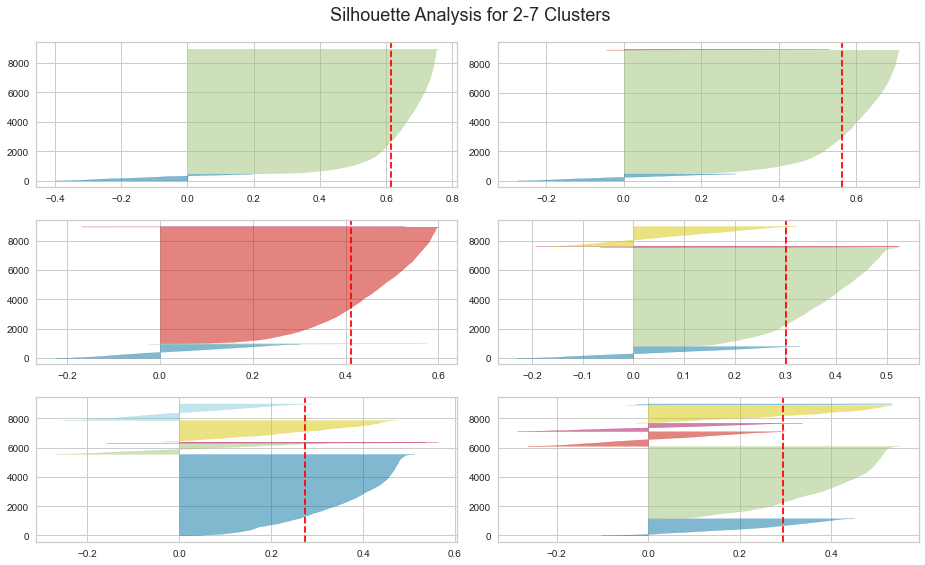

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7 below.

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

dari shilouettescore ini dapat kita ketahui bahwa cluster ke 5 mendekati 6 lah yang lebih optimal, karna memiliki lebih sedikit distribusi yang mengarah ke nilai negatif. 

# J. Model Inference

In [47]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [48]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [49]:
drop_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
             'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']

In [50]:
data = df.drop(drop_cols, axis=1)
data.head()

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,0.000000,12


In [51]:
X = data.drop(['CUST_ID'], axis=1)
y = data['CUST_ID']

print(X.shape)
print(y.shape)

(8950, 10)
(8950,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.20, random_state=13)

In [53]:
print(X_train.shape)
print(X_test.shape)

(7160, 10)
(1790, 10)
